## Арутюнян Айк 3821Б1ПР2

# 26. Нелинейный метод наименьших квадратов. Светимость звезды

[Каханер–Моулер–Нэш] Сверхновой звезде типа I соответствует специальная модель светимости. Спустя несколько дней после максимума светимости эту модель можно описать так: 𝐿(𝑡)=𝐶1𝑒−𝑡/𝛼1+𝐶2𝑒−𝑡/𝛼2,

где 𝑡 – время (в днях) с момента максимальной светимости, а 𝐿(𝑡) – светимость, относительно максимальной светимости. В таблице ниже приведены данные по относительной светимости для свехновой I939A6, полученные в 1936 г. Пик светимости приходится на день 0 , но наблюдения до дня 7.0 , опущены, так какуказанная модель не описывает светимости перед и непосредственно после максимума.

t      L(t)    
7.0 0.6310
7.0 0.8318
14.8 0.2754
16.0 0.1445
16.9 0.2089
17.0 0.1585
18.8 0.1585
19.0 0.1318
20.9 0.1585
15.8 0.1096
16.8 0.1445
28.0 0.09120
53.0 0.06310
54.0 0.06918
57.0 0.05754
85.0 0.03631
109.0 0.02291
110.0 0.02291
141.0 0.01738
142.0 0.01585
168.0 0.009120
Нанести данные на график. Нелинейным методом наименьших квадратов найдите неизвестные параметры модели и постройте графики. Используйте различные начальные значения для 𝛼1 , 𝛼2 , 𝐶1 , 𝐶2 . Чему равна результирующая суммарная ошибка? Рассмотрите также аппроксимацию одной экспонентой - решите эту задачу сведя ее к линейной задаче наименьших квадратов. Сравните все результаты. Насколько чувствительны результирующие значения к начальным значениям?

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import linalg
from scipy import optimize

Нанесение данных на график:

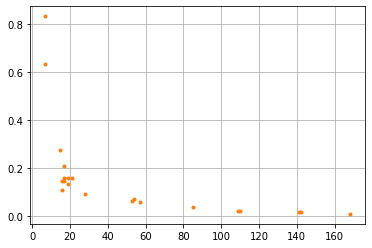

In [2]:
t = np.array([7.0, 7.0, 14.8, 16.0, 16.9, 17.0, 18.8, 19.0, 20.9, 15.8, 16.8, 28.0, 53.0, 54.0, 57.0, 85.0, 109.0,110.0,141.0, 142.0,168.0])
L = np.array([0.6310, 0.8318, 0.2754, 0.1445, 0.2089,0.1585,0.1585,0.1318,0.1585,0.1096,0.1445,0.09120,0.06310,0.06918,0.05754,0.03631,0.02291,0.02291 ,0.01738,0.01585,0.009120])
plt.grid()
plt.plot(t, L, '.', color = 'tab:orange')

Поиск неизвестных параметров нелинейным методом наименьших квадратов и построение графика

In [3]:
def L_t(t, C1, C2, a1, a2):
    return C1*math.e**(-t/a1) + C2*math.e**(-t/a2)
res, _ = optimize.curve_fit(L_t,t,L)
C1, C2, a1,a2 = res
C1, C2, a1,a2

(0.15975280972450118, 3.5662624699600376, 58.51405929626225, 3.890484999234576)

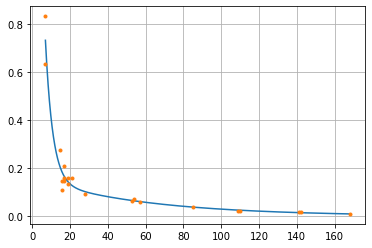

In [4]:
X_arr = np.linspace(np.min(t), np.max(t), 10000)
Y_arr = L_t(X_arr, C1, C2, a1, a2)
plt.grid()
plt.plot(X_arr, Y_arr)
plt.plot(t, L, ".", color = 'tab:orange')

Использование других начальных значений для С1, С2, а1, а2.

In [15]:
alternate_size = 30
alternate_t = np.array([np.random.randint(1, 200) for i in range(alternate_size)])
alternate_t.sort()
alternate_L = np.array([np.random.rand() for i in range(alternate_size)])
alternate_L.sort()
alternate_L = alternate_L[::-1]

In [18]:
def alternate_L_t(alternate_t, C1, C2, a1, a2):
    return C1*math.e**(-alternate_t/a1) + C2*math.e**(-alternate_t/a2)
res, _ = optimize.curve_fit(alternate_L_t,alternate_t,alternate_L)
C1, C2, a1,a2 = res
C1, C2, a1,a2

(0.6284736255410589,
 0.43156683740145535,
 90.93984245928745,
 16.128367215442566)

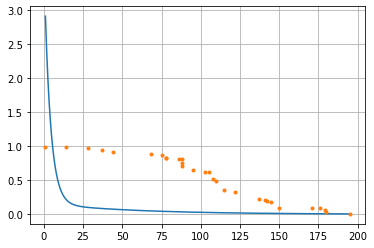

In [7]:
alternate_X_arr = np.linspace(np.min(alternate_t), np.max(alternate_t), 10000)
alternate_Y_arr = alternate_L_t(alternate_X_arr, C1, C2, a1, a2)
plt.grid()
plt.plot(alternate_X_arr, alternate_Y_arr)
plt.plot(alternate_t, alternate_L, ".", color = 'tab:orange')

Апроксимация одной экспонентой

In [19]:
def L_t_e(t,a1, a2):
    return math.e**(-t/a1) + math.e**(-t/a2)
res, _ = optimize.curve_fit(L_t_e,t,L)
a1,a2 = res
a1,a2

(8.078306231310245, 5.74676198224591)

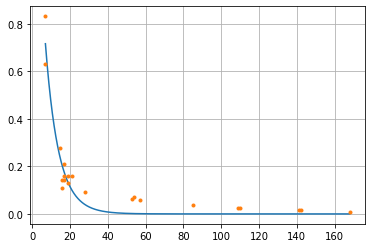

In [20]:
alternate_X_arr = np.linspace(np.min(t), np.max(t), 10000)
alternate_Y_arr = L_t_e(alternate_X_arr, a1, a2)
plt.grid()
plt.plot(alternate_X_arr, alternate_Y_arr)
plt.plot(t, L, ".", color = 'tab:orange')

Апроксимация одной экспонентой для альтернативных значений

In [41]:
def alternate_L_t_e(alternate_t, a1, a2):
    return math.e**(-alternate_t/a1) + math.e**(-alternate_t/a2)
res, _ = optimize.curve_fit(alternate_L_t_e,alternate_t,alternate_L)
a1,a2 = res
a1,a2

(56.65177502033353, 0.047872559341679666)

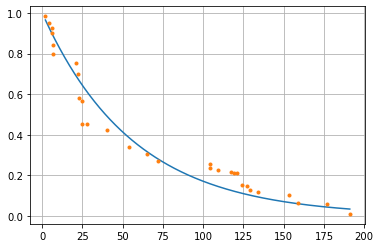

In [26]:
alternate_X_arr = np.linspace(np.min(alternate_t), np.max(alternate_t), 10000)
alternate_Y_arr = alternate_L_t_e(alternate_X_arr, a1, a2)
plt.grid()
plt.plot(alternate_X_arr, alternate_Y_arr)
plt.plot(alternate_t, alternate_L, ".", color = 'tab:orange')

Сумарная результирующая ошибка

In [31]:
np.sqrt(np.sum(L_t(t, C1, C2, a1, a2)/len(t))**2) #Начальные значения

0.32562976765112

In [32]:
np.sqrt(np.sum(alternate_L_t(alternate_t, C1, C2, a1, a2)/len(alternate_t))**2) #Альтернативные значения

0.2581985896934092

In [33]:
np.sqrt(np.sum(L_t_e(t, a1, a2)/len(t))**2) #Начальные значения по экспоненте

0.51812797612753

In [34]:
np.sqrt(np.sum(alternate_L_t_e(alternate_t, a1, a2)/len(alternate_t))**2) #Альтернативные значения по экспоненте

0.41083440768277846

Насколько чувствительны результирующие значения к начальным значениям?

In [35]:
# При увеличении количества входных значений увеличивается точность